1. Feature Selection- Dropping constant features 
Constant feautres with less variance have less information and hence can be removed to reduce dimensionality

In [1]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
df=pd.read_csv('train.csv',nrows=10000)
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
X=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']

In [4]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X)

var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [5]:
# Lets Find non-constant features 
len(X.columns[var_thres.get_support()])

285

In [6]:
constant_columns = [column for column in X.columns
                    if column not in X.columns[var_thres.get_support()]]

print(len(constant_columns))

85


In [7]:
for column in constant_columns:
    print(column)


ind_var2_0
ind_var2
ind_var13_medio_0
ind_var13_medio
ind_var18_0
ind_var18
ind_var27_0
ind_var28_0
ind_var28
ind_var27
ind_var34_0
ind_var34
ind_var41
ind_var46_0
ind_var46
num_var13_medio_0
num_var13_medio
num_var18_0
num_var18
num_var27_0
num_var28_0
num_var28
num_var27
num_var34_0
num_var34
num_var41
num_var46_0
num_var46
saldo_var13_medio
saldo_var18
saldo_var28
saldo_var27
saldo_var34
saldo_var41
saldo_var46
delta_imp_amort_var18_1y3
delta_imp_amort_var34_1y3
delta_imp_reemb_var17_1y3
delta_imp_reemb_var33_1y3
delta_imp_trasp_var17_out_1y3
delta_imp_trasp_var33_out_1y3
delta_num_reemb_var17_1y3
delta_num_reemb_var33_1y3
delta_num_trasp_var17_out_1y3
delta_num_trasp_var33_out_1y3
imp_amort_var18_hace3
imp_amort_var18_ult1
imp_amort_var34_hace3
imp_amort_var34_ult1
imp_var7_emit_ult1
imp_reemb_var13_hace3
imp_reemb_var17_hace3
imp_reemb_var17_ult1
imp_reemb_var33_hace3
imp_reemb_var33_ult1
imp_trasp_var17_in_hace3
imp_trasp_var17_out_hace3
imp_trasp_var17_out_ult1
imp_trasp_var33_i

In [8]:
X_train=X.drop(constant_columns,axis=1)
X_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


2. Feature Selection- With Correlation

In this step we will be removing the features which are highly correlated


In [9]:
X.corr()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
ID,1.000000,-0.002846,-0.002679,0.025045,0.007413,0.003251,0.002660,-0.005608,0.009758,0.010021,...,-0.001946,-0.013220,-0.008712,-0.011174,-0.010427,-0.010669,-0.007283,-0.008595,-0.008657,-0.007914
var3,-0.002846,1.000000,-0.007258,0.001157,0.005783,0.005883,0.001211,0.001369,0.000563,0.000586,...,0.000374,0.000434,0.000442,0.000464,0.000485,0.000709,0.000411,0.000849,0.000841,-0.000066
var15,-0.002679,-0.007258,1.000000,0.033298,0.112041,0.117091,0.060546,0.071889,0.015706,0.013459,...,0.020939,0.022834,0.021089,0.023337,0.023729,0.026193,0.018280,0.030226,0.029057,0.002010
imp_ent_var16_ult1,0.025045,0.001157,0.033298,1.000000,0.022729,0.019085,0.011131,0.008149,0.003582,0.008125,...,0.025710,-0.000699,-0.000690,-0.000645,-0.000643,-0.001113,-0.000604,-0.001359,-0.001344,0.000796
imp_op_var39_comer_ult1,0.007413,0.005783,0.112041,0.022729,1.000000,0.877528,0.475310,0.421565,0.074839,0.100495,...,0.008677,0.015432,0.039172,0.022054,0.029143,0.006858,0.000325,0.004799,0.003938,0.002213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
saldo_medio_var44_hace2,-0.010669,0.000709,0.026193,-0.001113,0.006858,0.007445,-0.001145,-0.001260,-0.000543,-0.000565,...,0.063266,-0.000408,-0.000403,-0.000437,-0.000455,1.000000,0.810665,0.902203,0.919532,0.011091
saldo_medio_var44_hace3,-0.007283,0.000411,0.018280,-0.000604,0.000325,0.000958,-0.000621,-0.000683,-0.000295,-0.000306,...,-0.000196,-0.000221,-0.000219,-0.000237,-0.000247,0.810665,1.000000,0.595163,0.617328,0.015887
saldo_medio_var44_ult1,-0.008595,0.000849,0.030226,-0.001359,0.004799,0.005448,-0.001398,-0.001539,-0.000664,-0.000690,...,0.256070,-0.000499,-0.000492,-0.000534,-0.000556,0.902203,0.595163,1.000000,0.991274,0.006543
saldo_medio_var44_ult3,-0.008657,0.000841,0.029057,-0.001344,0.003938,0.004291,-0.001382,-0.001521,-0.000656,-0.000682,...,0.201519,-0.000493,-0.000487,-0.000528,-0.000549,0.919532,0.617328,0.991274,1.000000,0.007447


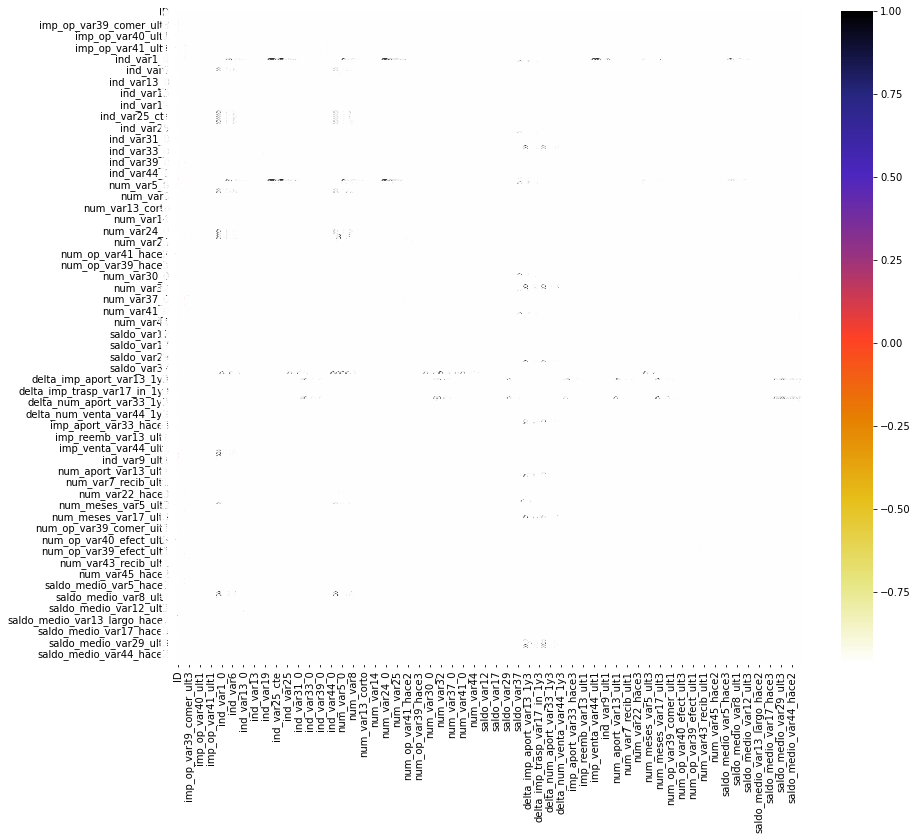

In [10]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(14,12))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [11]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [12]:
corr_features = correlation(X, 0.7)
len(set(corr_features))

215

In [13]:
corr_features

{'delta_imp_aport_var17_1y3',
 'delta_imp_aport_var33_1y3',
 'delta_imp_compra_var44_1y3',
 'delta_imp_venta_var44_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var13_ult1',
 'imp_aport_var17_ult1',
 'imp_aport_var33_hace3',
 'imp_aport_var33_ult1',
 'imp_compra_var44_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_reemb_var13_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var33_in_ult1',
 'imp_venta_var44_ult1',
 'ind_var10_ult1',
 'ind_var10cte_ult1',
 'ind_var12',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_corto_0'

In [14]:
X_train = X.drop(corr_features,axis=1)
X_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var40_comer_ult1,imp_op_var40_efect_ult1,imp_op_var41_efect_ult1,imp_sal_var16_ult1,ind_var1_0,...,saldo_medio_var8_hace2,saldo_medio_var8_hace3,saldo_medio_var12_hace3,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var29_hace3,var38
0,1,2,23,0.0,0.0,0.0,0,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0,0.0,0,39205.170000
1,3,2,34,0.0,0.0,0.0,0,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0,0.0,0,49278.030000
2,4,2,23,0.0,0.0,0.0,0,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0,0.0,0,67333.770000
3,8,2,37,0.0,195.0,0.0,0,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0,0.0,0,64007.970000
4,10,2,39,0.0,0.0,0.0,0,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0,0.0,0,117310.979016


3. Feature Selection-Information gain - mutual information In Classification Problem

In [15]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X, y)
mutual_info

array([2.45135203e-03, 0.00000000e+00, 1.68851777e-02, 1.72068979e-03,
       9.35783396e-04, 0.00000000e+00, 2.70872768e-04, 0.00000000e+00,
       6.50300370e-04, 0.00000000e+00, 0.00000000e+00, 4.56926176e-03,
       0.00000000e+00, 8.56282285e-04, 0.00000000e+00, 2.73992682e-04,
       3.05529797e-04, 0.00000000e+00, 2.02923585e-03, 3.70670239e-03,
       1.49843761e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.20148269e-03, 4.51945648e-03, 3.65815672e-03, 9.99926727e-04,
       1.37653146e-03, 1.56959910e-03, 3.86423947e-03, 2.26677008e-05,
       3.74691848e-03, 1.29134904e-03, 4.24280306e-03, 3.40019867e-03,
       4.30186125e-04, 1.04133696e-03, 0.00000000e+00, 7.03102268e-03,
       2.39887167e-03, 3.10088012e-04, 1.72815298e-04, 6.86849452e-04,
       4.96016141e-03, 0.00000000e+00, 9.13867269e-04, 3.46104697e-04,
       1.86858696e-03, 0.00000000e+00, 0.00000000e+00, 1.17247057e-03,
       2.57616665e-03, 1.88114073e-03, 3.24938218e-03, 1.18221184e-03,
      

In [16]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

var15                      0.016885
saldo_var30                0.011514
saldo_var42                0.011285
num_var35                  0.010457
saldo_medio_var5_hace3     0.009880
                             ...   
num_var41_0                0.000000
num_var40                  0.000000
num_sal_var16_ult1         0.000000
num_trasp_var17_in_ult1    0.000000
saldo_var31                0.000000
Length: 370, dtype: float64

<AxesSubplot:>

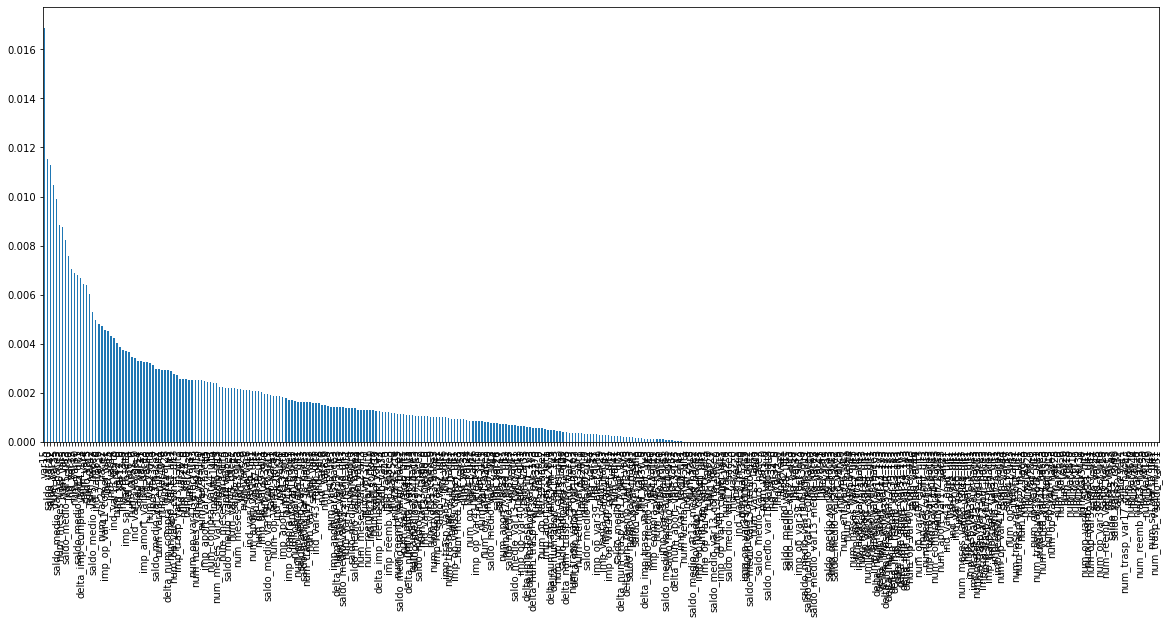

In [17]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [18]:
from sklearn.feature_selection import SelectKBest
#No we Will select the  top 5 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=5)
sel_five_cols.fit(X, y)
X.columns[sel_five_cols.get_support()]

Index(['var15', 'ind_var30', 'saldo_var30', 'saldo_medio_var5_hace3',
       'saldo_medio_var5_ult3'],
      dtype='object')

4. Feature Selection-Information gain - mutual information In Regression Problem 

In [19]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X, y)
mutual_info

array([2.46606033e-03, 1.14970369e-03, 2.37255402e-02, 0.00000000e+00,
       7.13193938e-03, 0.00000000e+00, 4.66247308e-03, 0.00000000e+00,
       1.04704576e-02, 9.05681309e-04, 0.00000000e+00, 9.98138823e-03,
       9.17688605e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.28041954e-03, 4.82701935e-03, 2.52371270e-03,
       0.00000000e+00, 2.59676650e-02, 0.00000000e+00, 1.71498741e-02,
       1.42248376e-02, 1.09195641e-02, 2.78463376e-03, 0.00000000e+00,
       9.50747939e-03, 6.84723487e-03, 1.51266158e-03, 2.52599944e-03,
       9.96154929e-03, 0.00000000e+00, 5.17295202e-03, 2.51305856e-03,
       0.00000000e+00, 0.00000000e+00, 1.89428652e-03, 1.34606305e-03,
       1.12052545e-03, 9.95187062e-03, 0.00000000e+00, 1.45545641e-03,
       1.04965972e-04, 0.00000000e+00, 3.37461898e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [20]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

ind_var5                         0.025968
var15                            0.023726
delta_num_trasp_var17_out_1y3    0.023527
num_trasp_var17_out_hace3        0.023190
ind_var41                        0.018884
                                   ...   
num_var22_hace2                  0.000000
num_op_var39_hace2               0.000000
num_var22_ult3                   0.000000
num_med_var22_ult3               0.000000
saldo_var31                      0.000000
Length: 370, dtype: float64

<AxesSubplot:>

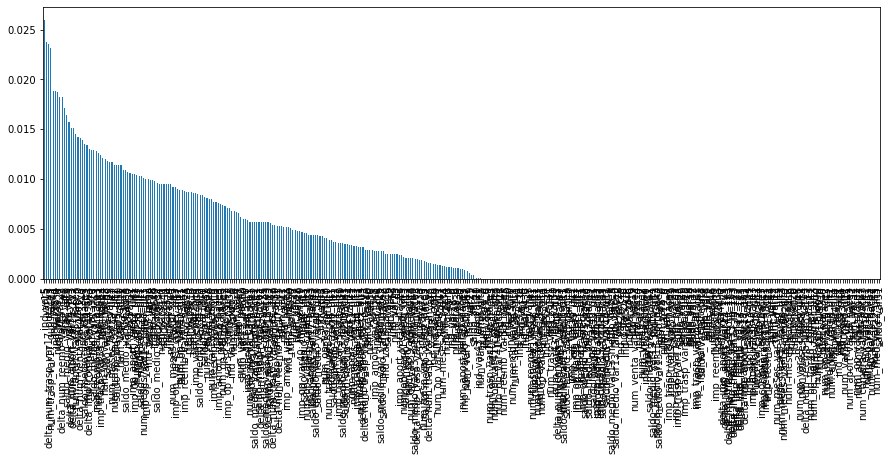

In [21]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [22]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X.fillna(0), y)
selected_top_columns.get_support()

array([False, False,  True, False, False, False, False, False, False,
        True, False, False,  True,  True, False, False, False, False,
       False,  True, False,  True, False, False, False,  True,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False,  True, False, False,  True, False, False,  True,  True,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False,  True,  True, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [23]:
X.columns[selected_top_columns.get_support()]

Index(['var15', 'imp_op_var40_efect_ult3', 'imp_op_var41_comer_ult3',
       'imp_op_var41_efect_ult1', 'imp_sal_var16_ult1', 'ind_var1', 'ind_var5',
       'ind_var6_0', 'ind_var13_0', 'ind_var19', 'ind_var24', 'ind_var28_0',
       'ind_var30', 'ind_var33_0', 'ind_var33', 'ind_var34', 'ind_var37',
       'ind_var40', 'ind_var41_0', 'ind_var44', 'num_var5', 'num_var8_0',
       'num_var8', 'num_var12', 'num_var13_largo_0', 'num_var20',
       'num_var24_0', 'num_var28_0', 'num_var37', 'num_var40', 'num_var42',
       'num_var46_0', 'saldo_var6', 'saldo_var8', 'saldo_var13_medio',
       'saldo_var13', 'saldo_var28', 'saldo_var30', 'saldo_var32',
       'saldo_var34', 'saldo_var37', 'saldo_var42', 'saldo_var44', 'var36',
       'delta_imp_amort_var18_1y3', 'delta_imp_reemb_var17_1y3',
       'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var33_out_1y3',
       'delta_num_compra_var44_1y3', 'imp_amort_var18_hace3',
       'imp_aport_var33_hace3', 'imp_trasp_var17_in_hace3',
       'ind_v